# 24 - Descriptive Statistics in Practice

**Key Idea:** Descriptive statistics are tools to summarize data so it makes sense at a glance.

**What we use:**
- **Measures of Center:** Mean, median, mode (what's typical?)
- **Measures of Spread:** Range, standard deviation, IQR (how varied is the data?)
- **Visualizations:** Histograms, boxplots (see the pattern quickly)

**Why it matters:** A quick statistical snapshot reveals patterns, outliers, and the story behind the numbers.

## Simple Example: Basketball Team Stats

A high school basketball team tracks points scored per game. Let's summarize their performance.

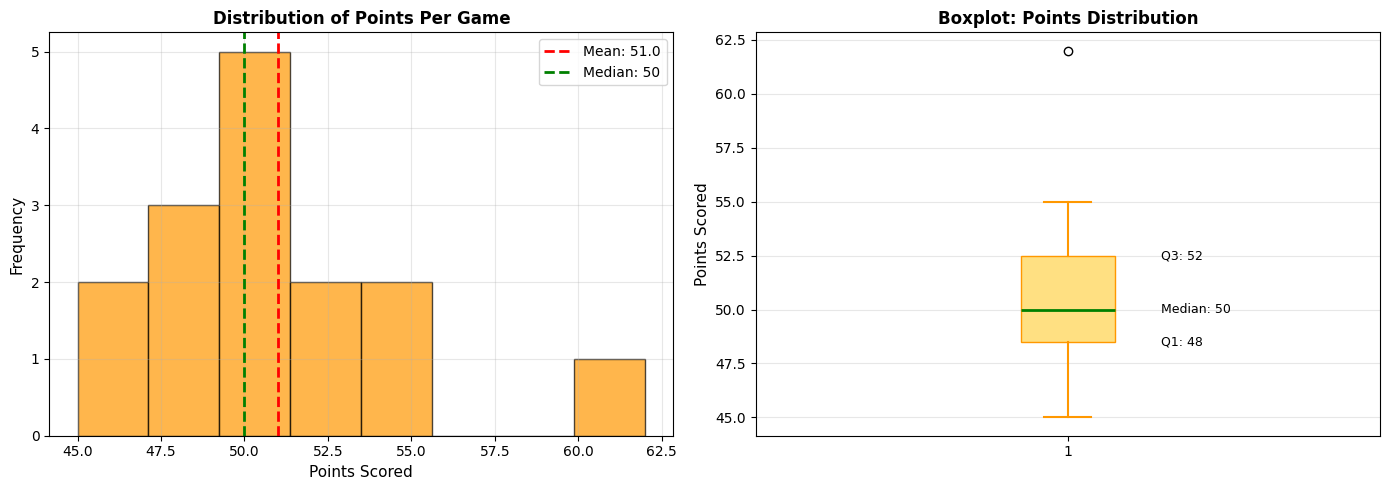


📊 Team Statistics Summary:

Center:
   Mean: 51.0 points
   Median: 50 points
   Mode: 50 points (most common score)

Spread:
   Range: 17 points (from 45 to 62)
   Std Dev: 4.0 points
   IQR: 4 points (middle 50% of scores)

💡 Insight: Consistent scoring! Most games between 48-54 points.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Points scored in 15 games
points = np.array([45, 52, 48, 55, 50, 62, 47, 51, 49, 53, 48, 50, 54, 51, 50])

# Calculate descriptive statistics
mean_pts = np.mean(points)
median_pts = np.median(points)
mode_pts = stats.mode(points, keepdims=True).mode[0]
std_pts = np.std(points, ddof=1)
range_pts = np.max(points) - np.min(points)
q1 = np.percentile(points, 25)
q3 = np.percentile(points, 75)
iqr = q3 - q1

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(points, bins=8, color='#FF9800', alpha=0.7, edgecolor='black')
ax1.axvline(mean_pts, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_pts:.1f}')
ax1.axvline(median_pts, color='green', linestyle='--', linewidth=2, label=f'Median: {median_pts:.0f}')
ax1.set_xlabel('Points Scored', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distribution of Points Per Game', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Boxplot
box = ax2.boxplot(points, vert=True, patch_artist=True,
                  boxprops=dict(facecolor='#FFE082', color='#FF9800'),
                  medianprops=dict(color='green', linewidth=2),
                  whiskerprops=dict(color='#FF9800', linewidth=1.5),
                  capprops=dict(color='#FF9800', linewidth=1.5))
ax2.set_ylabel('Points Scored', fontsize=11)
ax2.set_title('Boxplot: Points Distribution', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add quartile labels
ax2.text(1.15, q1, f'Q1: {q1:.0f}', va='center', fontsize=9)
ax2.text(1.15, median_pts, f'Median: {median_pts:.0f}', va='center', fontsize=9)
ax2.text(1.15, q3, f'Q3: {q3:.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Team Statistics Summary:")
print("\nCenter:")
print(f"   Mean: {mean_pts:.1f} points")
print(f"   Median: {median_pts:.0f} points")
print(f"   Mode: {mode_pts:.0f} points (most common score)")
print("\nSpread:")
print(f"   Range: {range_pts:.0f} points (from {np.min(points)} to {np.max(points)})")
print(f"   Std Dev: {std_pts:.1f} points")
print(f"   IQR: {iqr:.0f} points (middle 50% of scores)")
print("\n💡 Insight: Consistent scoring! Most games between 48-54 points.")

## Real-World Example: E-Commerce Customer Orders

An online store analyzes 500 customer orders. The mean looks good, but does it tell the full story?

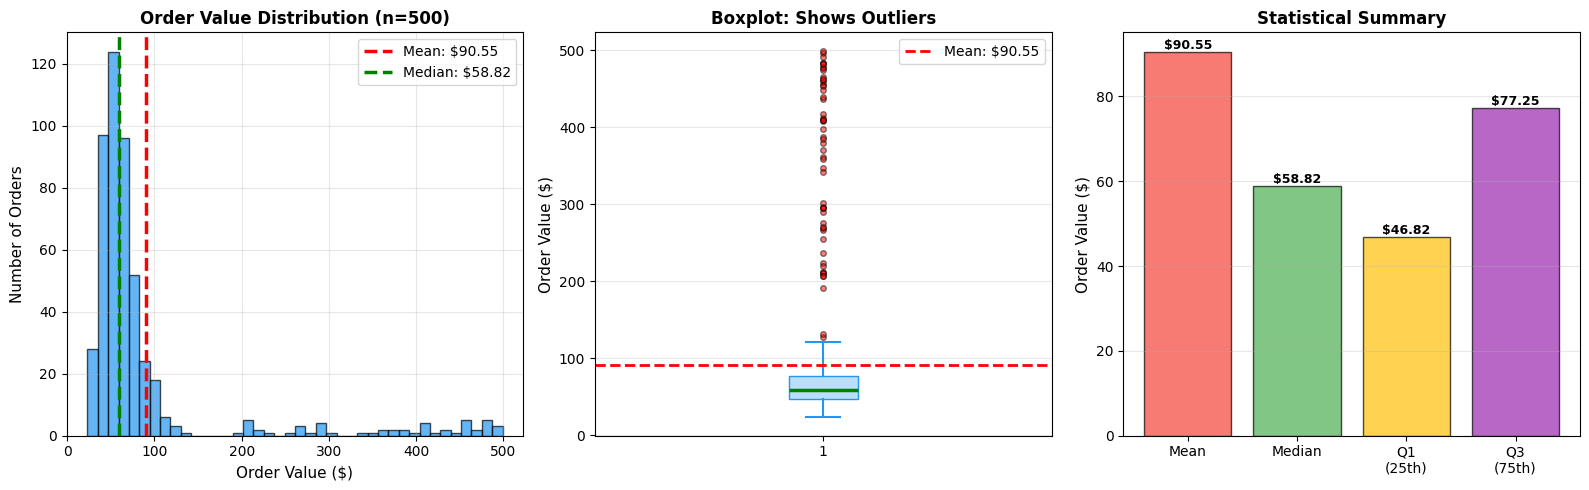


📊 Order Analysis Summary:

Center:
   Mean: $90.55 ← Inflated by big spenders!
   Median: $58.82 ← Typical customer order

Spread:
   Std Dev: $99.14
   IQR: $30.43 (middle 50%: $46.82 to $77.25)
   Range: $23.03 to $499.38

💡 Business Insights:
   → Mean is $31.73 higher than median!
   → This tells us: A few big spenders raise the average
   → For typical customer behavior, use MEDIAN
   → For total revenue planning, use MEAN

📈 Data Shape: Right-skewed (long tail of high values)
   Skewness indicator: 0.32 (positive = right skew)


In [2]:
# Simulate realistic e-commerce order data
np.random.seed(42)

# Most orders: $20-80 (typical customers)
typical_orders = np.random.gamma(4, 10, 450) + 20

# Few big spenders: $200-500 (enterprise/bulk orders)
big_orders = np.random.uniform(200, 500, 50)

orders = np.concatenate([typical_orders, big_orders])

# Calculate statistics
mean_order = np.mean(orders)
median_order = np.median(orders)
std_order = np.std(orders, ddof=1)
q1_order = np.percentile(orders, 25)
q3_order = np.percentile(orders, 75)
iqr_order = q3_order - q1_order

# Visualize
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Histogram
ax1.hist(orders, bins=40, color='#2196F3', alpha=0.7, edgecolor='black')
ax1.axvline(mean_order, color='red', linestyle='--', linewidth=2.5, label=f'Mean: ${mean_order:.2f}')
ax1.axvline(median_order, color='green', linestyle='--', linewidth=2.5, label=f'Median: ${median_order:.2f}')
ax1.set_xlabel('Order Value ($)', fontsize=11)
ax1.set_ylabel('Number of Orders', fontsize=11)
ax1.set_title('Order Value Distribution (n=500)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# Boxplot
box = ax2.boxplot(orders, vert=True, patch_artist=True,
                  boxprops=dict(facecolor='#BBDEFB', color='#2196F3'),
                  medianprops=dict(color='green', linewidth=2.5),
                  whiskerprops=dict(color='#2196F3', linewidth=1.5),
                  capprops=dict(color='#2196F3', linewidth=1.5),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
ax2.axhline(mean_order, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_order:.2f}')
ax2.set_ylabel('Order Value ($)', fontsize=11)
ax2.set_title('Boxplot: Shows Outliers', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# Bar comparison of statistics
stats_labels = ['Mean', 'Median', 'Q1\n(25th)', 'Q3\n(75th)']
stats_values = [mean_order, median_order, q1_order, q3_order]
colors_stats = ['#F44336', '#4CAF50', '#FFC107', '#9C27B0']

bars = ax3.bar(stats_labels, stats_values, color=colors_stats, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Order Value ($)', fontsize=11)
ax3.set_title('Statistical Summary', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars, stats_values):
    ax3.text(bar.get_x() + bar.get_width()/2., val,
            f'${val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Order Analysis Summary:")
print("\nCenter:")
print(f"   Mean: ${mean_order:.2f} ← Inflated by big spenders!")
print(f"   Median: ${median_order:.2f} ← Typical customer order")
print("\nSpread:")
print(f"   Std Dev: ${std_order:.2f}")
print(f"   IQR: ${iqr_order:.2f} (middle 50%: ${q1_order:.2f} to ${q3_order:.2f})")
print(f"   Range: ${np.min(orders):.2f} to ${np.max(orders):.2f}")

print("\n💡 Business Insights:")
print(f"   → Mean is ${mean_order - median_order:.2f} higher than median!")
print("   → This tells us: A few big spenders raise the average")
print("   → For typical customer behavior, use MEDIAN")
print("   → For total revenue planning, use MEAN")

# Calculate skewness
skew = (mean_order - median_order) / std_order
print(f"\n📈 Data Shape: Right-skewed (long tail of high values)")
print(f"   Skewness indicator: {skew:.2f} (positive = right skew)")

## Why Multiple Measures Matter: Side-by-Side Comparison

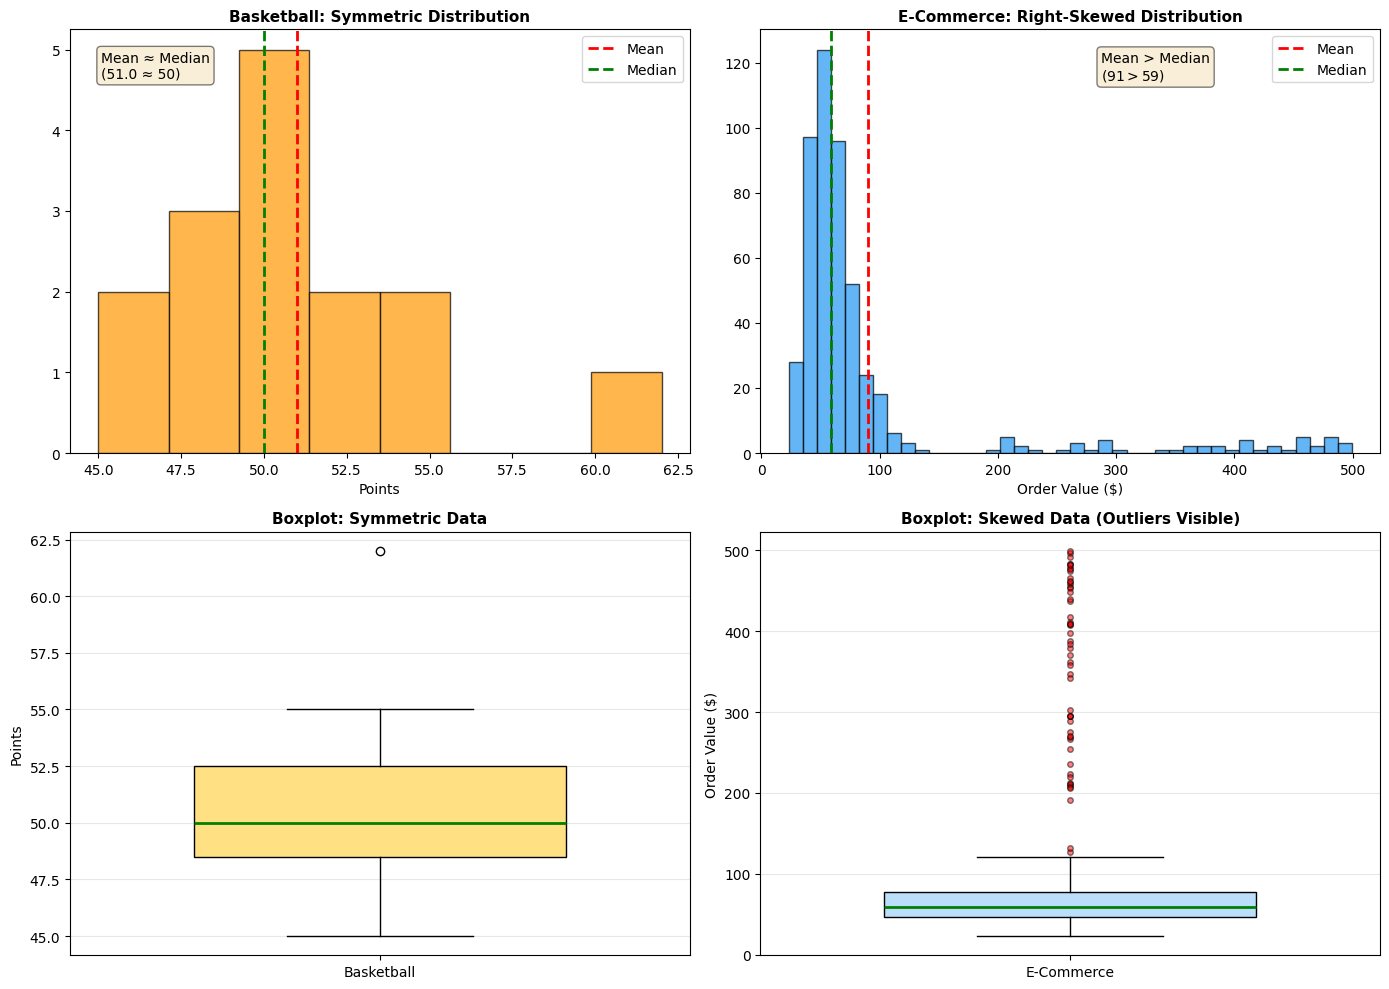


🎯 Key Takeaway:

   SYMMETRIC data (basketball):
   → Mean ≈ Median → Either measure works fine
   → No outliers → Mean is reliable

   SKEWED data (e-commerce):
   → Mean > Median → Mean pulled up by outliers
   → Use MEDIAN for typical behavior
   → Use MEAN for total/aggregate planning

   Always check BOTH measures + visualize to understand your data!


In [3]:
# Create comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Basketball (symmetric data)
ax1 = axes[0, 0]
ax1.hist(points, bins=8, color='#FF9800', alpha=0.7, edgecolor='black')
ax1.axvline(np.mean(points), color='red', linestyle='--', linewidth=2, label='Mean')
ax1.axvline(np.median(points), color='green', linestyle='--', linewidth=2, label='Median')
ax1.set_title('Basketball: Symmetric Distribution', fontsize=11, fontweight='bold')
ax1.set_xlabel('Points', fontsize=10)
ax1.legend()
ax1.text(0.05, 0.95, f'Mean ≈ Median\n({np.mean(points):.1f} ≈ {np.median(points):.0f})',
         transform=ax1.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# E-commerce (skewed data)
ax2 = axes[0, 1]
ax2.hist(orders, bins=40, color='#2196F3', alpha=0.7, edgecolor='black')
ax2.axvline(mean_order, color='red', linestyle='--', linewidth=2, label='Mean')
ax2.axvline(median_order, color='green', linestyle='--', linewidth=2, label='Median')
ax2.set_title('E-Commerce: Right-Skewed Distribution', fontsize=11, fontweight='bold')
ax2.set_xlabel('Order Value ($)', fontsize=10)
ax2.legend()
ax2.text(0.55, 0.95, f'Mean > Median\n(${mean_order:.0f} > ${median_order:.0f})',
         transform=ax2.transAxes, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Boxplot comparison
ax3 = axes[1, 0]
bp1 = ax3.boxplot([points], positions=[1], widths=0.6, patch_artist=True,
                   boxprops=dict(facecolor='#FFE082'), medianprops=dict(color='green', linewidth=2))
ax3.set_xticks([1])
ax3.set_xticklabels(['Basketball'])
ax3.set_ylabel('Points', fontsize=10)
ax3.set_title('Boxplot: Symmetric Data', fontsize=11, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

ax4 = axes[1, 1]
bp2 = ax4.boxplot([orders], positions=[1], widths=0.6, patch_artist=True,
                   boxprops=dict(facecolor='#BBDEFB'), medianprops=dict(color='green', linewidth=2),
                   flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
ax4.set_xticks([1])
ax4.set_xticklabels(['E-Commerce'])
ax4.set_ylabel('Order Value ($)', fontsize=10)
ax4.set_title('Boxplot: Skewed Data (Outliers Visible)', fontsize=11, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 Key Takeaway:")
print("\n   SYMMETRIC data (basketball):")
print("   → Mean ≈ Median → Either measure works fine")
print("   → No outliers → Mean is reliable")
print("\n   SKEWED data (e-commerce):")
print("   → Mean > Median → Mean pulled up by outliers")
print("   → Use MEDIAN for typical behavior")
print("   → Use MEAN for total/aggregate planning")
print("\n   Always check BOTH measures + visualize to understand your data!")

## Summary: The Power of Descriptive Statistics

### What We Learned

**Measures of Center:**
- Mean: Good for symmetric data, sensitive to outliers
- Median: Robust to outliers, better for skewed data
- Mode: Most common value, useful for categorical data

**Measures of Spread:**
- Range: Overall span (max - min)
- Standard Deviation: Average distance from mean
- IQR: Middle 50% spread, robust to outliers

**Visualizations:**
- Histogram: See the shape and distribution
- Boxplot: Identify outliers and quartiles quickly

### Real-World Applications

| Scenario | Best Measure | Why? |
|----------|--------------|------|
| **Website traffic** | Median page views | Few power users skew mean |
| **Product pricing** | Mean revenue | Need total for forecasting |
| **Employee salary** | Median salary | Fairer representation |
| **Test scores** | Mean if symmetric | Median if outliers present |
| **Customer satisfaction** | Mode (rating) | Most common sentiment |

### Pro Tips
1. **Always visualize first** - Don't rely on numbers alone!
2. **Report multiple measures** - Mean AND median tell a fuller story
3. **Watch for outliers** - They can mislead if you only look at mean
4. **Consider data shape** - Symmetric vs skewed changes what's appropriate
5. **Context matters** - Choose measures based on your business question

**Bottom line:** Descriptive statistics turn raw data into actionable insights - but only if you use the right tools!